In [ ]:
##Observable trends based on the data:
# 1 - There are more rides in rural areas than in other areas as expected becasue of the population density
# 2 - Rural rides bring more revenue (higher fare), most likely due to longer rides
# 3 - The large majority of Urban rides are very low fare compare to other types

In [1]:
#DONE
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_data_df = pd.merge(ride_data_to_load_df, city_data_to_load_df, how='left', on="city", sort=False)
combine_data_df.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

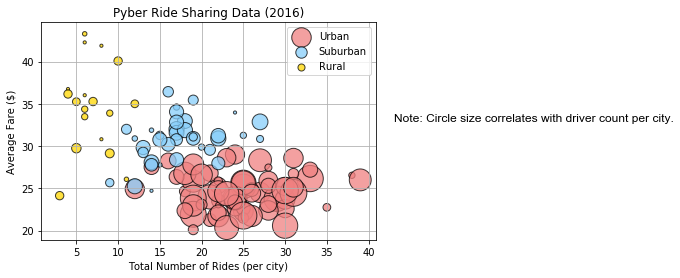

In [3]:
#build three df, one for each type
urban_df = combine_data_df[combine_data_df['type'] =='Urban']
suburban_df = combine_data_df[combine_data_df['type'] =='Suburban']
rural_df = combine_data_df[combine_data_df['type'] =='Rural']


#get values for totals grouping by city for each type
urban_avg_fare = urban_df.groupby('city').mean()['fare']
urban_driver_count = urban_df.groupby('city').mean()['driver_count']
urban_ride_count = urban_df.groupby('city').count()['ride_id']

suburban_avg_fare = suburban_df.groupby('city').mean()['fare']
suburban_driver_count = suburban_df.groupby('city').mean()['driver_count']
suburban_ride_count = suburban_df.groupby('city').count()['ride_id']

rural_avg_fare = rural_df.groupby('city').mean()['fare']
rural_driver_count = rural_df.groupby('city').mean()['driver_count']
rural_ride_count = rural_df.groupby('city').count()['ride_id']


#bluil bubble chart using scatter.
plt.scatter(x=urban_ride_count, y=urban_avg_fare, s=10*urban_driver_count,
           edgecolor='black', linewidth=1, color='Lightcoral', marker='o', label='Urban', alpha=0.75)

plt.scatter(x=suburban_ride_count, y=suburban_avg_fare, s=10*suburban_driver_count,
           edgecolor='black', linewidth=1, color='Lightskyblue', marker='o', label='Suburban', alpha=0.75)

plt.scatter(x=rural_ride_count, y=rural_avg_fare, s=10*rural_driver_count,
           edgecolor='black', linewidth=1, color='gold', marker='o', label='Rural', alpha=0.75)


#add labels and grid to the plot
plt.title('Pyber Ride Sharing Data (2016)')
plt.legend()
plt.grid()
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')

#properties for plt.text
font = {'family': 'arial', 'color':  'black', 'weight': 'normal','size': 12,}
#add text to the right of the plot
plt.text(43, 33, r'Note: Circle size correlates with driver count per city.', fontdict=font)

#save image to data folder
plt.savefig("data/bubbles.png")

plt.show()



## Total Fares by City Type

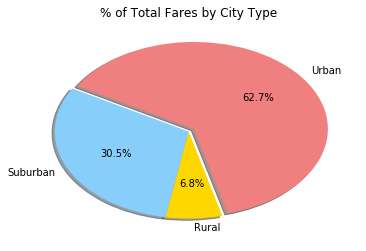

In [47]:
types = ["Rural", "Urban", "Suburban"]
sum_of_fares = [rural_df['fare'].sum(), urban_df['fare'].sum(), suburban_df['fare'].sum()]
colors = ["gold", "lightcoral", "Lightskyblue"]
explode = (0, 0.05, 0)

plt.title("% of Total Fares by City Type")
plt.pie(sum_of_fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)

#save image to data folder
plt.savefig("data/total_fares_pie.png")

plt.show()


## Total Rides by City Type

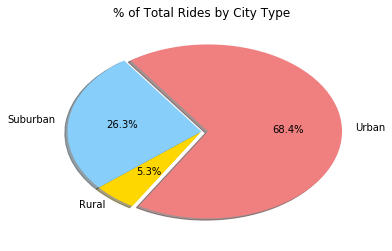

In [48]:
types = ["Rural", "Urban", "Suburban"]
sum_of_fares = [rural_df['ride_id'].count(), urban_df['ride_id'].count(), suburban_df['ride_id'].count()]
colors = ["gold", "lightcoral", "Lightskyblue"]
explode = (0, 0.05, 0)

plt.title("% of Total Rides by City Type")
plt.pie(sum_of_fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)

#save image to data folder
plt.savefig("data/total_rides_pie.png")

plt.show()


## Total Drivers by City Type

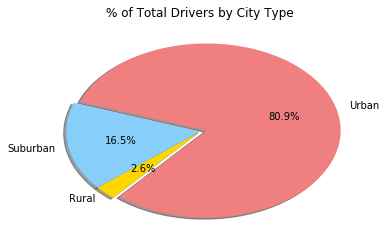

In [49]:
types = ["Rural", "Urban", "Suburban"]

rural_a = rural_df.groupby('city').mean()['driver_count']
rural_b = rural_a.sum()
urban_a = urban_df.groupby('city').mean()['driver_count']
urban_b = urban_a.sum()
suburban_a = suburban_df.groupby('city').mean()['driver_count']
suburban_b = suburban_a.sum()


sum_of_fares = [rural_b, urban_b, suburban_b]
colors = ["gold", "lightcoral", "Lightskyblue"]
explode = (0, 0.05, 0)

plt.title("% of Total Drivers by City Type")
plt.pie(sum_of_fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)

#save image to data folder
plt.savefig("data/total_drivers_pie.png")

plt.show()
